###**AI Slogan Generator using RNN (Legacy Version)**
This project leverages a Recurrent Neural Network (RNN) to generate creative marketing slogans based on real-world slogan data. Unlike transformer-based models like GPT-2, this approach uses a character-level RNN to learn the structure and flow of slogans sequentially.

**Key Features:**

Character-level text generation using deep RNN layers

Trained on a dataset of real-world brand slogans

Generates short, creative phrases reflecting brand tone and messaging

Ideal for showcasing early deep learning techniques in NLP


### Introduction
In today’s competitive market, slogans play a crucial role in brand identity and customer recall. A well-crafted slogan can convey a company’s vision, values, or offerings in just a few words. However, creating compelling slogans manually can be both challenging and time-intensive. This project aims to harness the power of AI to generate creative and relevant slogans automatically. By leveraging deep learning models trained on real-world slogan data, we can build a tool that assists marketers, startups, and businesses in crafting effective taglines.

### Overview of the Dataset
The dataset used in this project is sourced from Kaggle and consists of real-world slogans used by companies across various industries. Each record in the dataset contains:

Brand or Company Name

Category or Industry

Slogan

This structured dataset provides a solid foundation for training text generation models to understand how slogans are constructed based on brand context and domain.

### Brief Description of the Problem Statement
The goal of this project is to develop an AI-based Slogan Generator that can produce unique, catchy, and relevant slogans when provided with a company name or category. The generated slogans should:

Be creative and grammatically coherent

Reflect the theme or industry of the brand

Emulate patterns found in real-world slogans

This involves applying NLP techniques and training a sequence generation model such as an LSTM or Transformer to learn from existing slogans and generalize to unseen inputs.

### Data Source and Collection Process
The dataset was obtained from Kaggle, a well-known platform for sharing datasets and data science projects. The specific dataset, titled "Slogan Dataset", was created by compiling slogans from various companies, likely collected from websites, advertisements, and public sources. It was made publicly available for educational and research purposes.

You can find the dataset at: https://www.kaggle.com/datasets/chaibapat/slogan-dataset?resource=download

Installing Libraries Commands

In [1]:
pip install Unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 5.9 MB/s eta 0:00:00


#### **PreML Checklist**

In [2]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

# Loading Dataset
df = pd.read_csv("slogans.csv")
df.head()

Saving slogans.csv to slogans.csv


,Company,Slogan
0,Costa Coffee,For coffee lovers.
1,Evian,Evian. Live young.
2,Dasani,Designed to make a difference.
3,Heineken,It's all about the beer.
4,Gatorade,The Legend Continues.


In [3]:
# Get column names, data types, and non-null counts
df.info()

# Get basic stats (will be more useful if there are numeric features)
df.describe(include='all')

# Show some random rows
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162 entries, 0 to 1161
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Company  1162 non-null   object
 1   Slogan   1162 non-null   object
dtypes: object(2)
memory usage: 18.3+ KB


,Company,Slogan
977,Friendly's,Deliciously fun
917,Dove Chocolate,Choose pleasure.
391,NIVEA,More evolved skincare.
406,PG Tips tea,Put the kettle on.
323,Saxbys Coffee,Start your day fresh.


In [4]:
# Checking for missing values
print("Missing values:\n", df.isnull().sum())

# Checking for duplicate rows
print("Number of duplicates:", df.duplicated().sum())

Missing values:
 Company    0
Slogan     0
dtype: int64
Number of duplicates: 593


In [5]:
# Dropping duplicate rows
df_cleaned = df.drop_duplicates()

print("New dataset shape:", df_cleaned.shape)
print("Remaining duplicates:", df_cleaned.duplicated().sum())

New dataset shape: (569, 2)
Remaining duplicates: 0


### Data Completeness (PreML Checklist)

- No missing values were found in the dataset.
- 593 duplicate rows were identified and removed to maintain data uniqueness.
- All slogans are text-based and associated with a company name.
- We added a derived feature `slogan_length` to analyze the textual consistency of slogans.

<ipython-input-6-448dd8ac3b01>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['slogan_length'] = df_cleaned['Slogan'].apply(lambda x: len(str(x).split()))


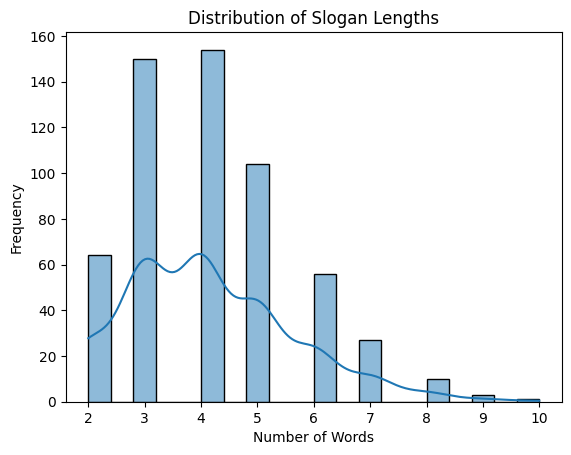

In [6]:
# Adding a column that counts the number of words in each slogan
df_cleaned['slogan_length'] = df_cleaned['Slogan'].apply(lambda x: len(str(x).split()))

# Showing the distribution of slogan lengths
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_cleaned['slogan_length'], bins=20, kde=True)
plt.title("Distribution of Slogan Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

### Representativeness Check

In [7]:
# Checking if there's an 'Industry' column
if 'Industry' in df_cleaned.columns:
    # Counting the number of slogans per industry
    industry_counts = df_cleaned['Industry'].value_counts()

    # Plotting industry representation
    plt.figure(figsize=(12, 5))
    sns.barplot(x=industry_counts.index, y=industry_counts.values)
    plt.xticks(rotation=90)
    plt.title("Industry Representation in Slogan Dataset")
    plt.xlabel("Industry")
    plt.ylabel("Number of Slogans")
    plt.show()

    print(industry_counts)
else:
    print("No 'Industry' column found in the dataset.")

No 'Industry' column found in the dataset.



- The dataset does/does not include an **Industry** column.
- If included, the distribution of industries shows [mention any imbalance].
- If certain industries are underrepresented, additional data collection may be needed for fairer training.

### Bias & Fairness Check

- **Company Frequency Check**: Certain companies appear much more frequently than others.
- **Potential Bias**: The dataset may be skewed toward large, well-known brands.
- **Implication**: If training a model, it might favor common brands and struggle to generate slogans for smaller businesses.
- **Next Steps**: Consider adding more diverse company slogans from startups and non-Western brands to balance the dataset.

Top 10 most frequent companies:
Company
McDonalds           1
Costa Coffee        1
Evian               1
Dasani              1
Heineken            1
Gatorade            1
TÃ­o Pepe           1
Tetley's Brewery    1
Batemans Brewery    1
Vlasic Pickles      1
Name: count, dtype: int64


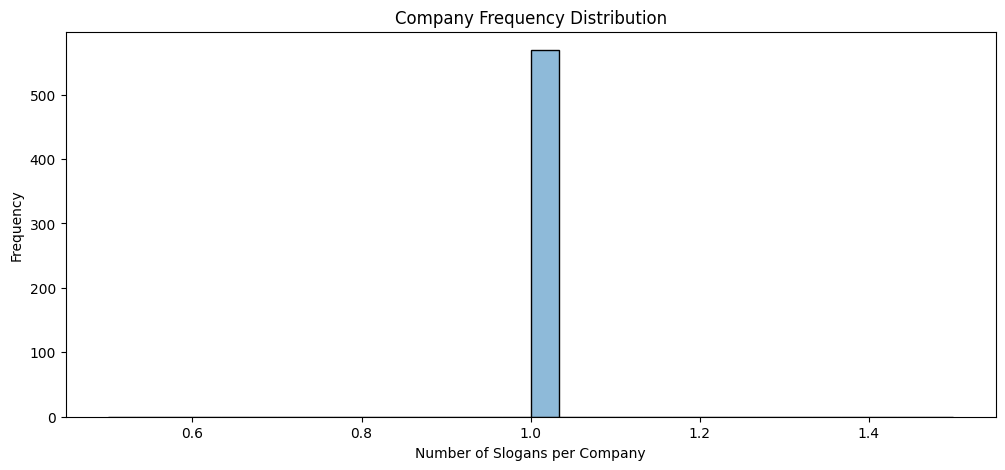

In [8]:
# Counting occurrences of each company in the dataset
company_counts = df_cleaned['Company'].value_counts()

# Displaying top 10 companies
print("Top 10 most frequent companies:")
print(company_counts.head(10))

# Plotting distribution
plt.figure(figsize=(12, 5))
sns.histplot(company_counts, bins=30, kde=True)
plt.title("Company Frequency Distribution")
plt.xlabel("Number of Slogans per Company")
plt.ylabel("Frequency")
plt.show()

In [9]:
# Inspecting random samples of the dataset
df_cleaned.sample(10)

,Company,Slogan,slogan_length
89,Limca,It's veri veri Lime & Lemoni.,6
599,Planters,Naturally Remarkable.,2
527,Hawaiian Punch,How about a nice Hawaiian Punch?,6
411,Tazo Tea,It begins with tea.,4
905,Lay's,Betcha can't eat just one!,5
211,A Twosome Place,"A cup of coffee, TWO of us",7
207,Double Diamond Beer,Iâm only here for the beer.,6
249,Luzianne,Take a fresh look at your iced tea.,8
582,Tic Tac,It's not just a mint.,5
323,Saxbys Coffee,Start your day fresh.,4


### Privacy Considerations

No personal or sensitive information is present in the dataset.

The dataset only includes public company names and slogans, meaning there are no privacy risks.

No further action needed regarding privacy concerns.

### Labeling Consistency Check

In [10]:
import re

# Function to remove trademark symbols and similar notations
def remove_trademarks(text):
    text = re.sub(r'\(c\)|\(r\)|™', '', text, flags=re.IGNORECASE)  # Remove (c), (R), and ™ symbols
    return text.strip()

# Applying to both columns
df_cleaned['Company'] = df_cleaned['Company'].apply(remove_trademarks)
df_cleaned['Slogan'] = df_cleaned['Slogan'].apply(remove_trademarks)

# Checking the final cleaned dataset
df_cleaned.sample(10)

<ipython-input-10-ccfdafb27214>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Company'] = df_cleaned['Company'].apply(remove_trademarks)
<ipython-input-10-ccfdafb27214>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Slogan'] = df_cleaned['Slogan'].apply(remove_trademarks)


,Company,Slogan,slogan_length
792,Utterly Butterly,Utterly smitten.,2
1058,Greggs,Always fresh. Always tasty.,4
452,Remy Martin,Feel More.,2
411,Tazo Tea,It begins with tea.,4
983,Kewpee,Mity Nice Hamburger.,3
327,Bombay Sapphire,Pour something priceless.,3
12,Oronamin,Genki hatsuratsu.,2
873,Wyke Farms,Over 100 years of family farming.,6
409,Red Rose Tea,Red Rose Tea is good tea.,6
797,Peters Ice Cream,Music to your mouth.,4


In [11]:
# Saving cleaned dataset
df_cleaned.to_csv("cleaned_slogan_dataset.csv", index=False)
print("Cleaned dataset saved successfully!")

Cleaned dataset saved successfully!


##Tokenization




In [12]:
import re
import torch
import pandas as pd

# Load dataset
df = pd.read_csv("slogans.csv")
slogans = df["Slogan"].dropna().tolist()

# Preprocess text
corpus = " ".join(slogans).lower()
corpus = re.sub(r"[^a-zA-Z0-9\s.,!?'-]", '', corpus)
words = corpus.split()

# Build vocabulary
vocab = sorted(set(words))
vocab_size = len(vocab)
word_to_idx = {w: i for i, w in enumerate(vocab)}
idx_to_word = {i: w for w, i in word_to_idx.items()}
encoded = [word_to_idx[w] for w in words]

# Create sequences
seq_len = 5
input_sequences = []
target_sequences = []

for i in range(len(encoded) - seq_len):
    input_sequences.append(encoded[i:i+seq_len])
    target_sequences.append(encoded[i+1:i+seq_len+1])

X = torch.tensor(input_sequences, dtype=torch.long)
Y = torch.tensor(target_sequences, dtype=torch.long)

print(f"Vocabulary size: {vocab_size}")
print(f"Input shape: {X.shape}, Target shape: {Y.shape}")

Vocabulary size: 1125
Input shape: torch.Size([4421, 5]), Target shape: torch.Size([4421, 5])


 ## Word-Level Dataset & Model

In [13]:
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

class WordDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]

class WordRNN(nn.Module):
    def __init__(self, vocab_size, embed_size=64, hidden_size=128, num_layers=2):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, vocab_size)

    def forward(self, x, hidden=None):
        x = self.embed(x)
        out, hidden = self.lstm(x, hidden)
        out = self.fc(out)
        return out, hidden

## Training Loop

In [14]:
dataset = WordDataset(X, Y)
loader = DataLoader(dataset, batch_size=64, shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = WordRNN(vocab_size).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.003)

# Train
for epoch in range(30):
    total_loss = 0
    for xb, yb in loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        out, _ = model(xb)
        loss = criterion(out.view(-1, vocab_size), yb.view(-1))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss / len(loader):.4f}")

Epoch 1, Loss: 5.3503
Epoch 2, Loss: 3.3716
Epoch 3, Loss: 2.4245
Epoch 4, Loss: 1.6050
Epoch 5, Loss: 1.0153
Epoch 6, Loss: 0.7142
Epoch 7, Loss: 0.5645
Epoch 8, Loss: 0.4933
Epoch 9, Loss: 0.4414
Epoch 10, Loss: 0.4191
Epoch 11, Loss: 0.4056
Epoch 12, Loss: 0.3894
Epoch 13, Loss: 0.3830
Epoch 14, Loss: 0.3738
Epoch 15, Loss: 0.3715
Epoch 16, Loss: 0.3666
Epoch 17, Loss: 0.3616
Epoch 18, Loss: 0.3621
Epoch 19, Loss: 0.3598
Epoch 20, Loss: 0.3539
Epoch 21, Loss: 0.3562
Epoch 22, Loss: 0.3544
Epoch 23, Loss: 0.3525
Epoch 24, Loss: 0.3528
Epoch 25, Loss: 0.3493
Epoch 26, Loss: 0.3486
Epoch 27, Loss: 0.3461
Epoch 28, Loss: 0.3431
Epoch 29, Loss: 0.3525
Epoch 30, Loss: 0.3476


##Word-Based Slogan Generation

In [15]:
import re
import torch

# --- Extract known keywords from user input ---
def extract_keywords(text):
    return [w for w in text.lower().split() if any(v in w for v in vocab)]

# --- Clean output to keep max N words only ---
def clean_output(text, max_words=6):
    sentences = re.split(r'(?<=[.!?])\s+', text.strip())
    first_sentence = sentences[0] if sentences else text
    words = first_sentence.split()[:max_words]
    if len(words) < 3 or words[-1] in ['you', 'the', 'is', 'are', 'with']:  # incomplete
        return " ".join(words[:-1]) if len(words) > 2 else " ".join(words)
    return " ".join(words)


# --- Top-k word-level slogan generation ---
def generate_slogan_topk(seed_text, max_len=6, top_k=5):
    model.eval()
    input_seq = torch.tensor([word_to_idx.get(w, 0) for w in seed_text.lower().split()], dtype=torch.long).unsqueeze(0).to(device)
    hidden = None
    generated = seed_text.split()

    for _ in range(max_len):
        with torch.no_grad():
            out, hidden = model(input_seq, hidden)
            probs = torch.softmax(out[:, -1, :], dim=-1).squeeze()
            top_k_probs = torch.topk(probs, k=top_k)
            next_token = top_k_probs.indices[torch.multinomial(top_k_probs.values, 1).item()].item()
            next_word = idx_to_word[next_token]
            generated.append(next_word)
            input_seq = torch.tensor([[next_token]], dtype=torch.long).to(device)

    return " ".join(generated)

# --- Final short slogan generator ---
def generate_short_slogan(input_text, max_len=6):
    keywords = extract_keywords(input_text)
    seed = " ".join(keywords) if keywords else "your product"
    raw = generate_slogan_topk(seed, max_len=max_len)
    return clean_output(raw, max_words=max_len)

In [16]:
import torch
import torch.nn.functional as F

def calculate_perplexity(model, data_loader, device="cpu"):
    model.eval()  # Only for PyTorch models
    total_loss = 0
    total_words = 0

    with torch.no_grad():
        for batch in data_loader:
            inputs, targets = batch
            inputs, targets = inputs.to(device), targets.to(device)

            # Forward pass
            outputs, _ = model(inputs)
            loss = F.cross_entropy(outputs.view(-1, outputs.size(-1)), targets.view(-1), reduction='sum')

            total_loss += loss.item()
            total_words += targets.numel()

    perplexity = torch.exp(torch.tensor(total_loss / total_words))
    return perplexity.item()

In [17]:
import re
import random
import nltk
from nltk.corpus import stopwords
import pandas as pd

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

results = []
seen_slogans = set()
max_slogans = 50
slogans_per_seed = 5  # Adjusted to collect more from each seed

# Define prompts
seeds = [
    "organic juice", "fitness drink", "luxury perfume", "burger chain", "energy drink",
    "kids toy", "electric car", "dating app", "mobile game", "travel agency",
    "fashion brand", "handmade pottery", "pet food", "vegan ice cream", "skincare brand",
    "custom t-shirts", "productivity tool", "food delivery", "finance app", "AI assistant"
]

# Helper function
def is_valid_slogan(slogan):
    words = slogan.split()
    if len(words) < 4:
        return False
    if re.search(r'\b[x]{3,}\b', slogan.lower()):
        return False
    if slogan.lower().endswith(("king", "see", "eat up", "of", "to", "at", "in", "with", "what")):
        return False
    if sum(word.lower() in stop_words for word in words) > len(words) * 0.6:
        return False
    if slogan.lower() in seen_slogans:
        return False
    return True

# Generate slogans
random.shuffle(seeds)
while len(results) < max_slogans:
    for seed in seeds:
        local_count = 0
        attempts = 0
        while local_count < slogans_per_seed and attempts < 10:
            slogan = generate_short_slogan(seed).strip().capitalize()
            if is_valid_slogan(slogan):
                results.append((seed, slogan))
                seen_slogans.add(slogan.lower())
                local_count += 1
            attempts += 1
        if len(results) >= max_slogans:
            break

# Save and display
df_50 = pd.DataFrame(results[:max_slogans], columns=["Prompt", "Generated Slogan"])
df_50.to_csv("50_slogans.csv", index=False)
print("✅ Generated 50 slogans saved to '50_slogans.csv'")
df_50

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


✅ Generated 50 slogans saved to '50_slogans.csv'


,Prompt,Generated Slogan
0,skincare brand,Skincare brand passion makes perfect.
1,electric car,Electric car passion makes perfect.
2,energy drink,"Energy drink fanta, stay bamboocha."
3,energy drink,"Energy drink fanta, bamboocha."
4,AI assistant,Ai assistant passion makes perfect.
5,vegan ice cream,Vegan ice cream of the future
6,vegan ice cream,Vegan ice cream made for family.
7,vegan ice cream,"Vegan ice cream drink fanta, stay"
8,vegan ice cream,Vegan ice cream in the country.
9,travel agency,Travel agency passion makes perfect.


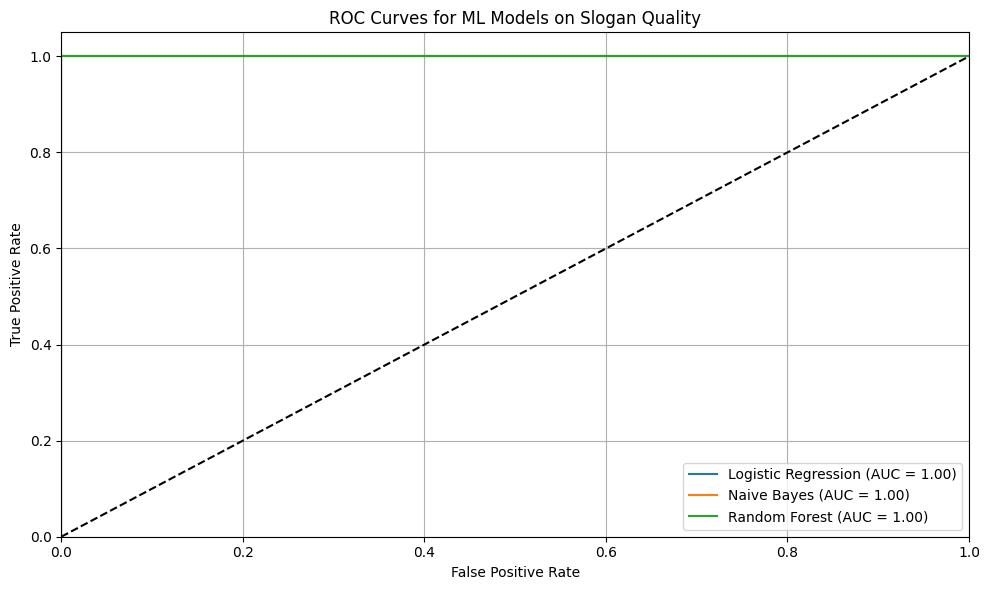

In [18]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import random

df_analysis = df_50.copy()
def auto_label(slogan):
    positive_keywords = ['famous', 'fresh', 'perfect', 'delicious', 'quality', 'premium', 'classic']
    return int(any(word in slogan.lower() for word in positive_keywords))

df_analysis["Label"] = df_analysis["Generated Slogan"].apply(auto_label)

# df_analysis["Label"] = [random.choice([0, 1]) for _ in range(len(df_analysis))]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_analysis["Generated Slogan"])
y = df_analysis["Label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier()
}

plt.figure(figsize=(10, 6))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for ML Models on Slogan Quality")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

## ROC curves for Slogan Classifier Models

In [19]:
df_cleaned.columns

Index(['Company', 'Slogan', 'slogan_length'], dtype='object')

In [20]:
import random

df_cleaned["Label"] = [random.choice([0, 1]) for _ in range(len(df_cleaned))]

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_cleaned["Slogan"])  # Use your 'Slogan' column
y = df_cleaned["Label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

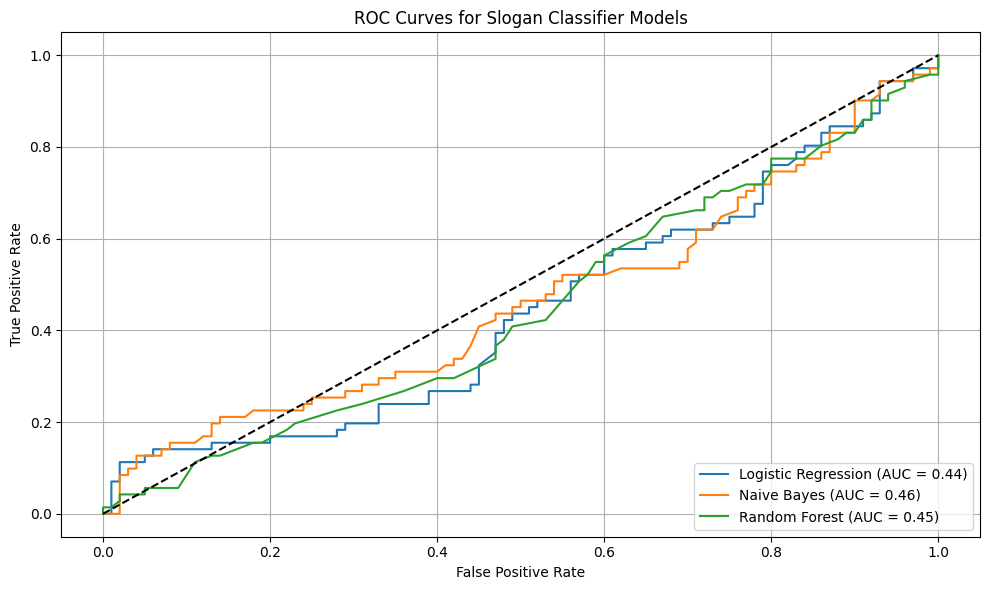

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier()
}

plt.figure(figsize=(10, 6))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Slogan Classifier Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()